In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [4]:
thedata = pd.read_csv('C:/Users/kavya/OneDrive/Desktop/diabetes.csv')
thedata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print("Data type : ", type(thedata))
print("Data dims : ", thedata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (768, 9)


In [6]:
thedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
print(thedata.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [8]:
thedata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Cleaning the data to check and remove NULL values

In [9]:
# checking if there's null values present 
missing_values_count = thedata.isnull().sum() 

print(missing_values_count)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### EDA

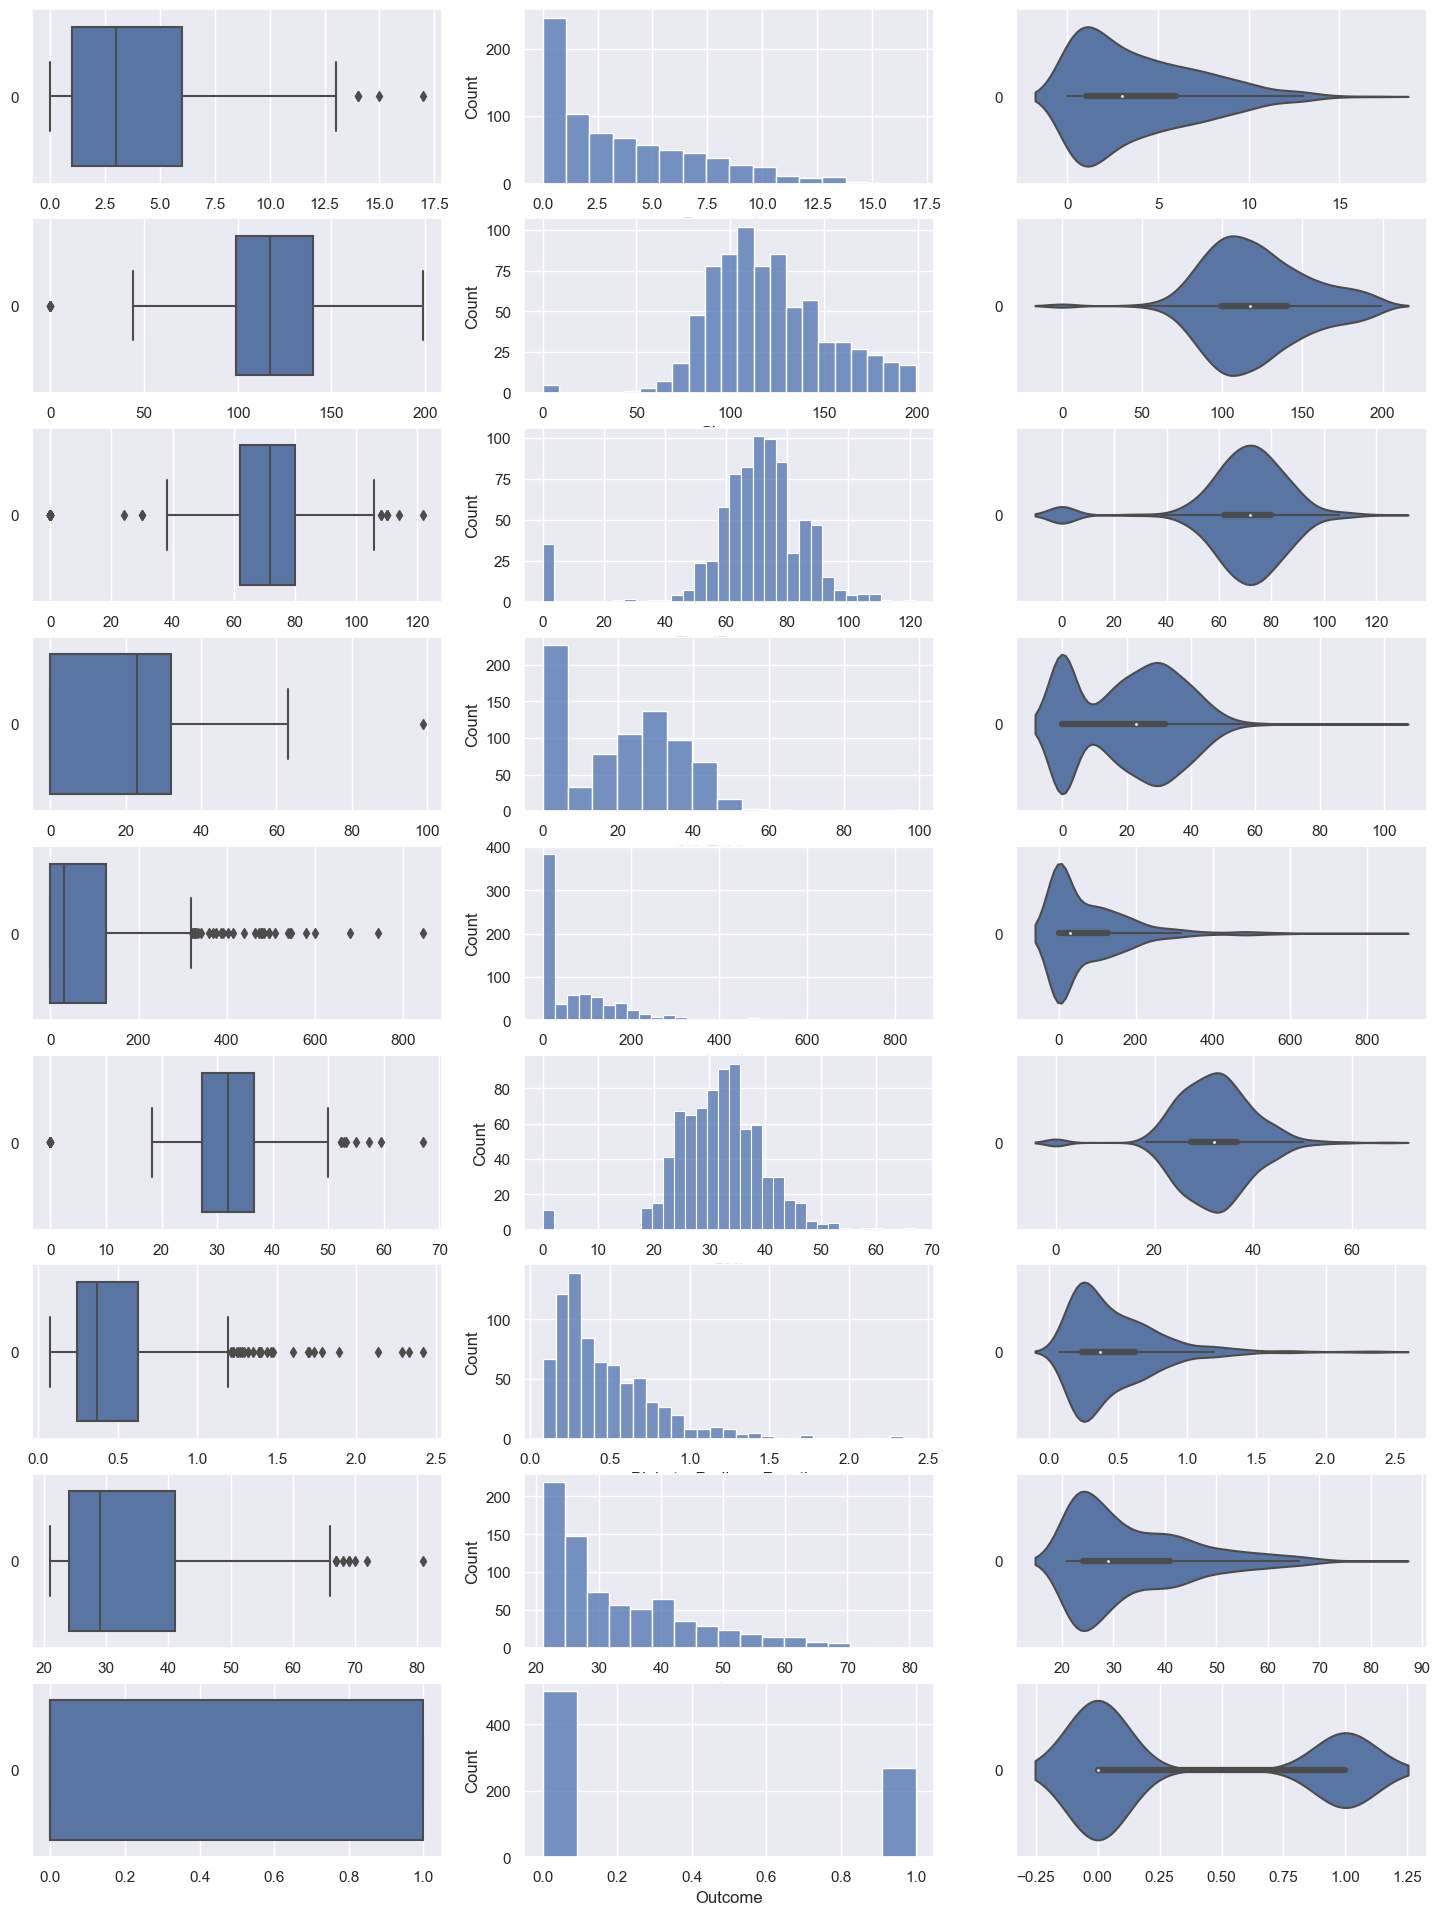

In [13]:
# Draw the distributions of all variables
f, axes = plt.subplots(9, 3, figsize=(18, 24))

count = 0
for var in thedata:
    sb.boxplot(data = thedata[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = thedata[var], ax = axes[count,1])
    sb.violinplot(data = thedata[var], orient = "h", ax = axes[count,2])
    count += 1

<Axes: >

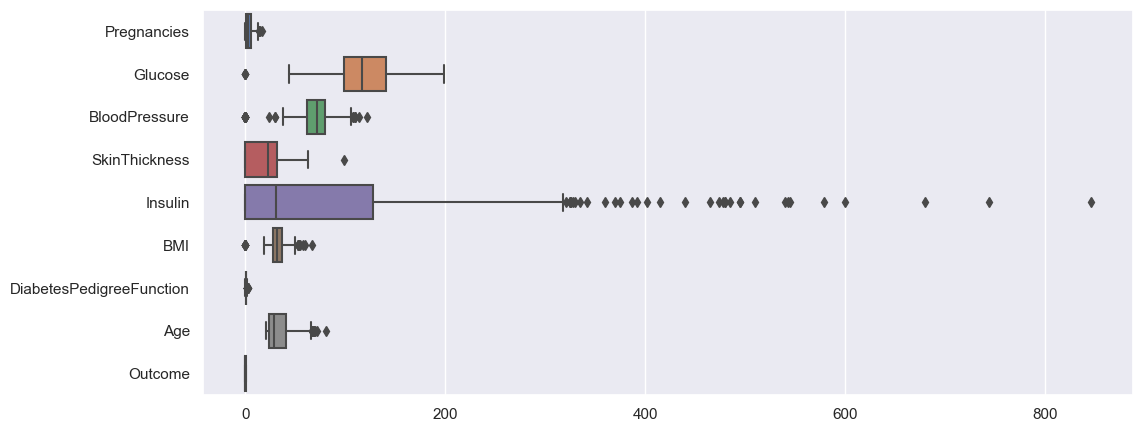

In [15]:
f = plt.figure(figsize=(12, 5))
sb.boxplot(data = thedata, orient = "h")

#### Showing the relationship between glucose and insulin

In [53]:
thedata2 = pd.DataFrame(thedata[["Glucose", "Insulin"]])
thedata2.describe()

,Glucose,Insulin
count,768.000000,768.000000
mean,120.894531,79.799479
std,31.972618,115.244002
min,0.000000,0.000000
25%,99.000000,0.000000
50%,117.000000,30.500000
75%,140.250000,127.250000
max,199.000000,846.000000


C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

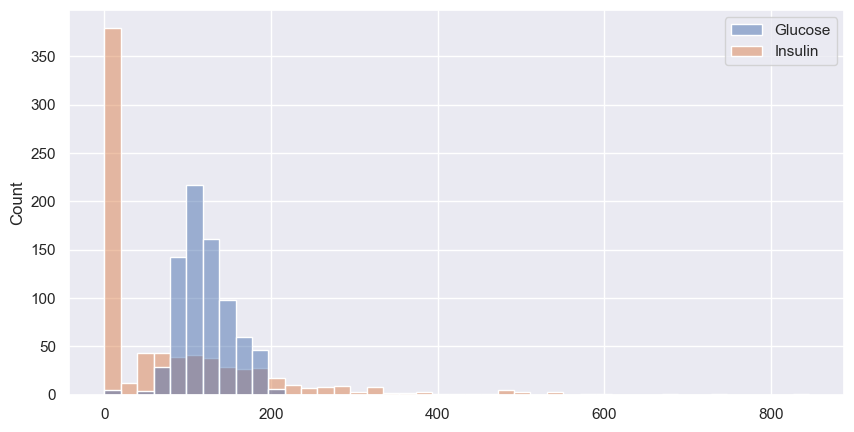

In [23]:
f = plt.figure(figsize=(10, 5))
sb.histplot(data = thedata2)

The above graph shows no clear link between the two. While insulin levels might respond to glucose, there's no strong upward or downward trend, suggesting high variability. Hence, no definitive conclusion can be drawn using the above visual representation.  

In [26]:
jointddata = pd.concat([thedata["Insulin"], thedata["Glucose"]], axis = 1).reindex(thedata["Glucose"].index)
jointddata

,Insulin,Glucose
0,0,148
1,0,85
2,0,183
3,94,89
4,168,137
...,...,...
763,180,101
764,0,122
765,112,121
766,0,126


C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


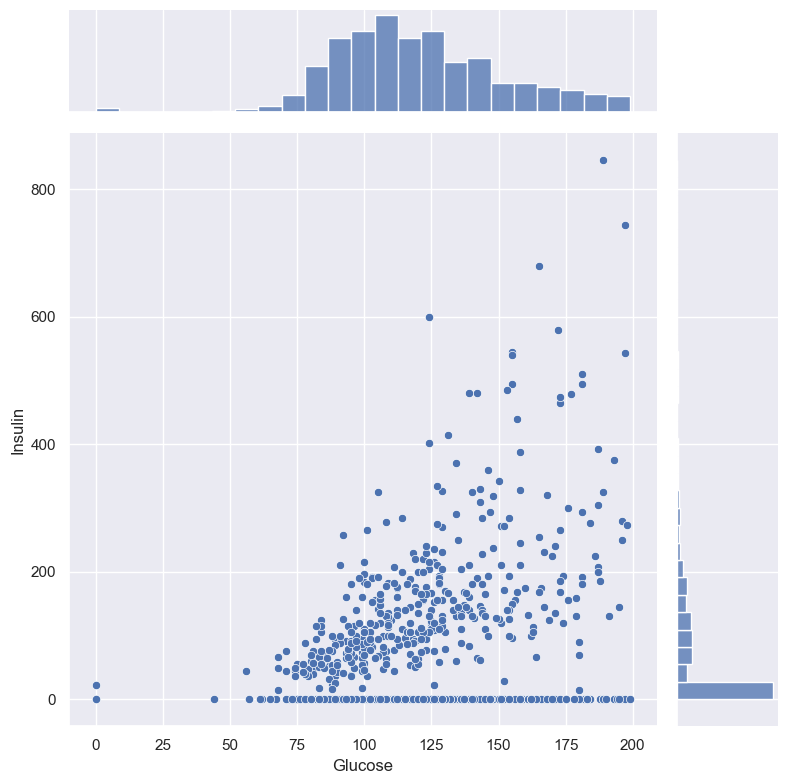

In [29]:
sb.jointplot(data = jointddata, x = "Glucose", y = "Insulin", height = 8)

In the above plot, we can observe a weak correlation between glucose and insulin levels in our dataset. It shows that data points don't form a perfect line but show a faint upward trend from left to right.: Some points could deviate from the trend, suggesting factors besides glucose might influence insulin levels .

In [31]:
jointddata2 = pd.concat([thedata["BMI"], thedata["Glucose"]], axis = 1).reindex(thedata["Glucose"].index)
jointddata2

,BMI,Glucose
0,33.6,148
1,26.6,85
2,23.3,183
3,28.1,89
4,43.1,137
...,...,...
763,32.9,101
764,36.8,122
765,26.2,121
766,30.1,126


C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mani7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


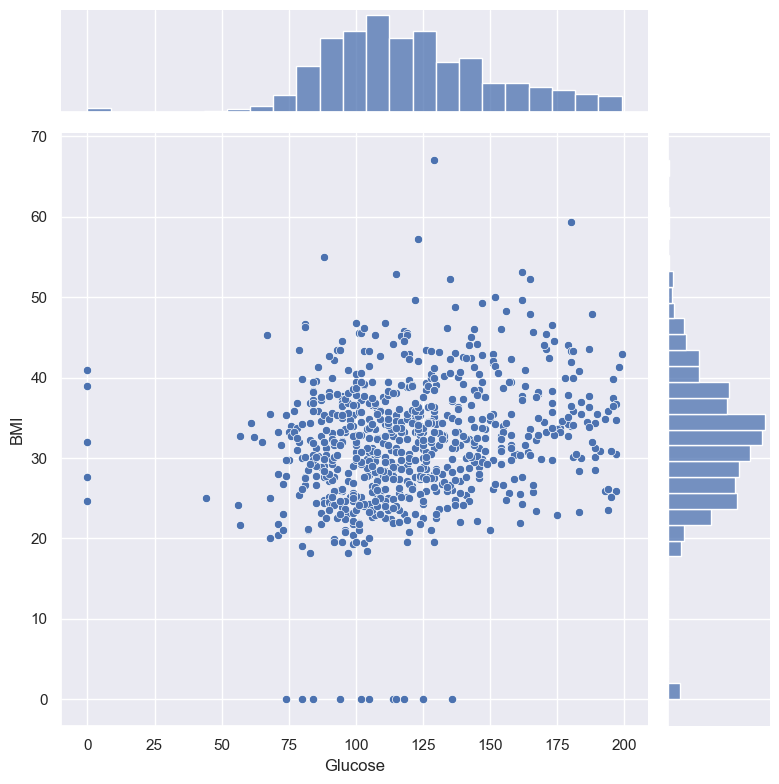

In [32]:
sb.jointplot(data = jointddata2, x = "Glucose", y = "BMI", height = 8)

The scatter plot shows a positive correlation between BMI and glucose. This means that as BMI increases, blood glucose levels also tend to increase.  However, it is important to note that correlation does not necessarily imply causation. There could be other factors that influence both BMI and blood glucose levels

<Axes: >

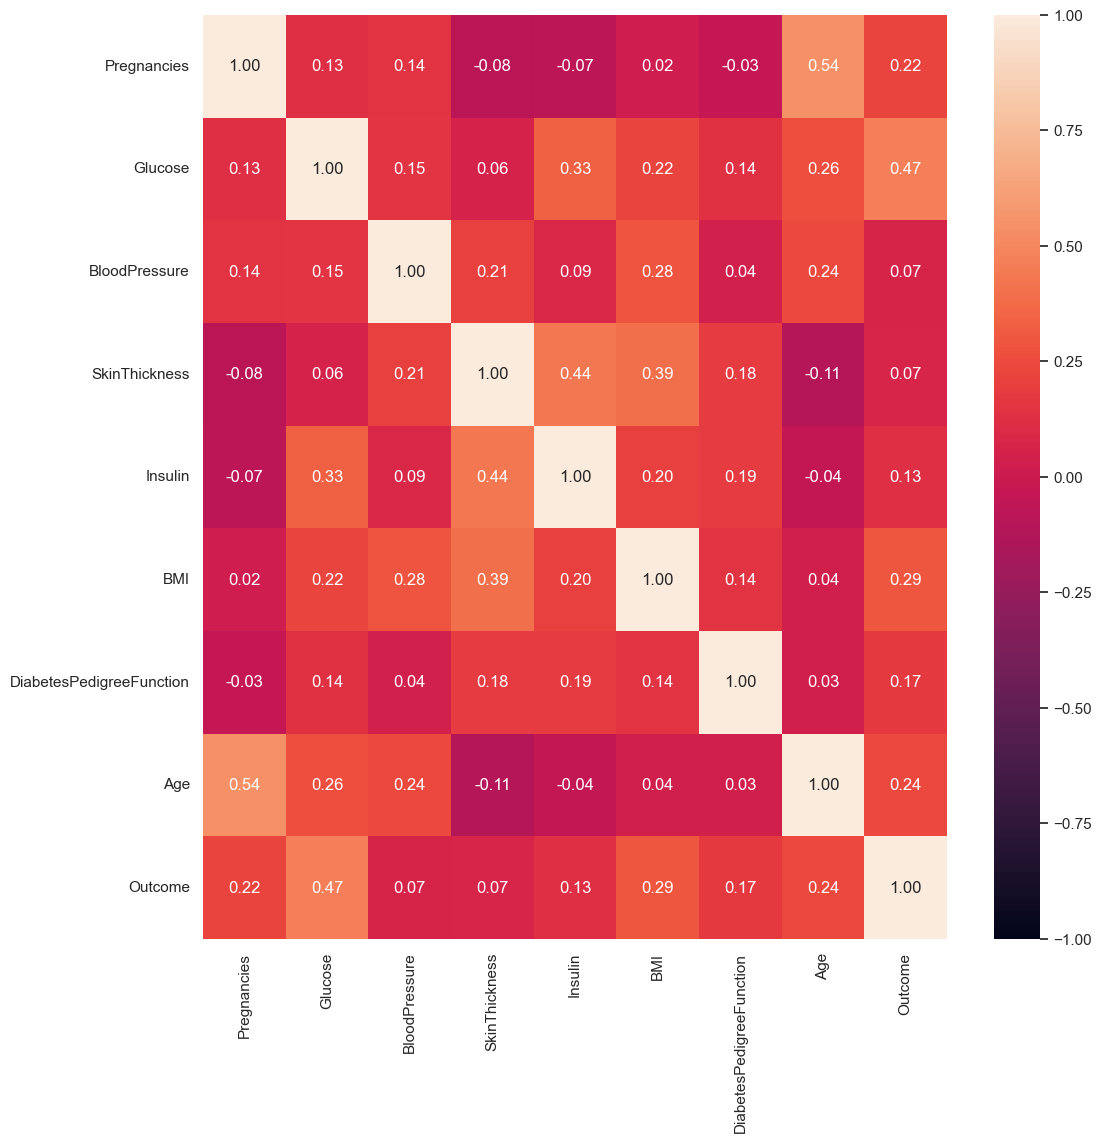

In [15]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(thedata.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Based on the heatmap that we have, we can see that glucose is the one variable with the highest relationship with the outcome, so the fact that people have diabetes.
Also, the insulin level might be most related to skin thickness and glucose. While glucose has the maximum effect BMI stands second

In [16]:
# Diabetes poeple in the Dataset
legnd_data = thedata[thedata["Outcome"] == True]
print("Number of Diabetes poeple :", len(legnd_data))

Number of Diabetes poeple : 268


/Users/audreyluhonge/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


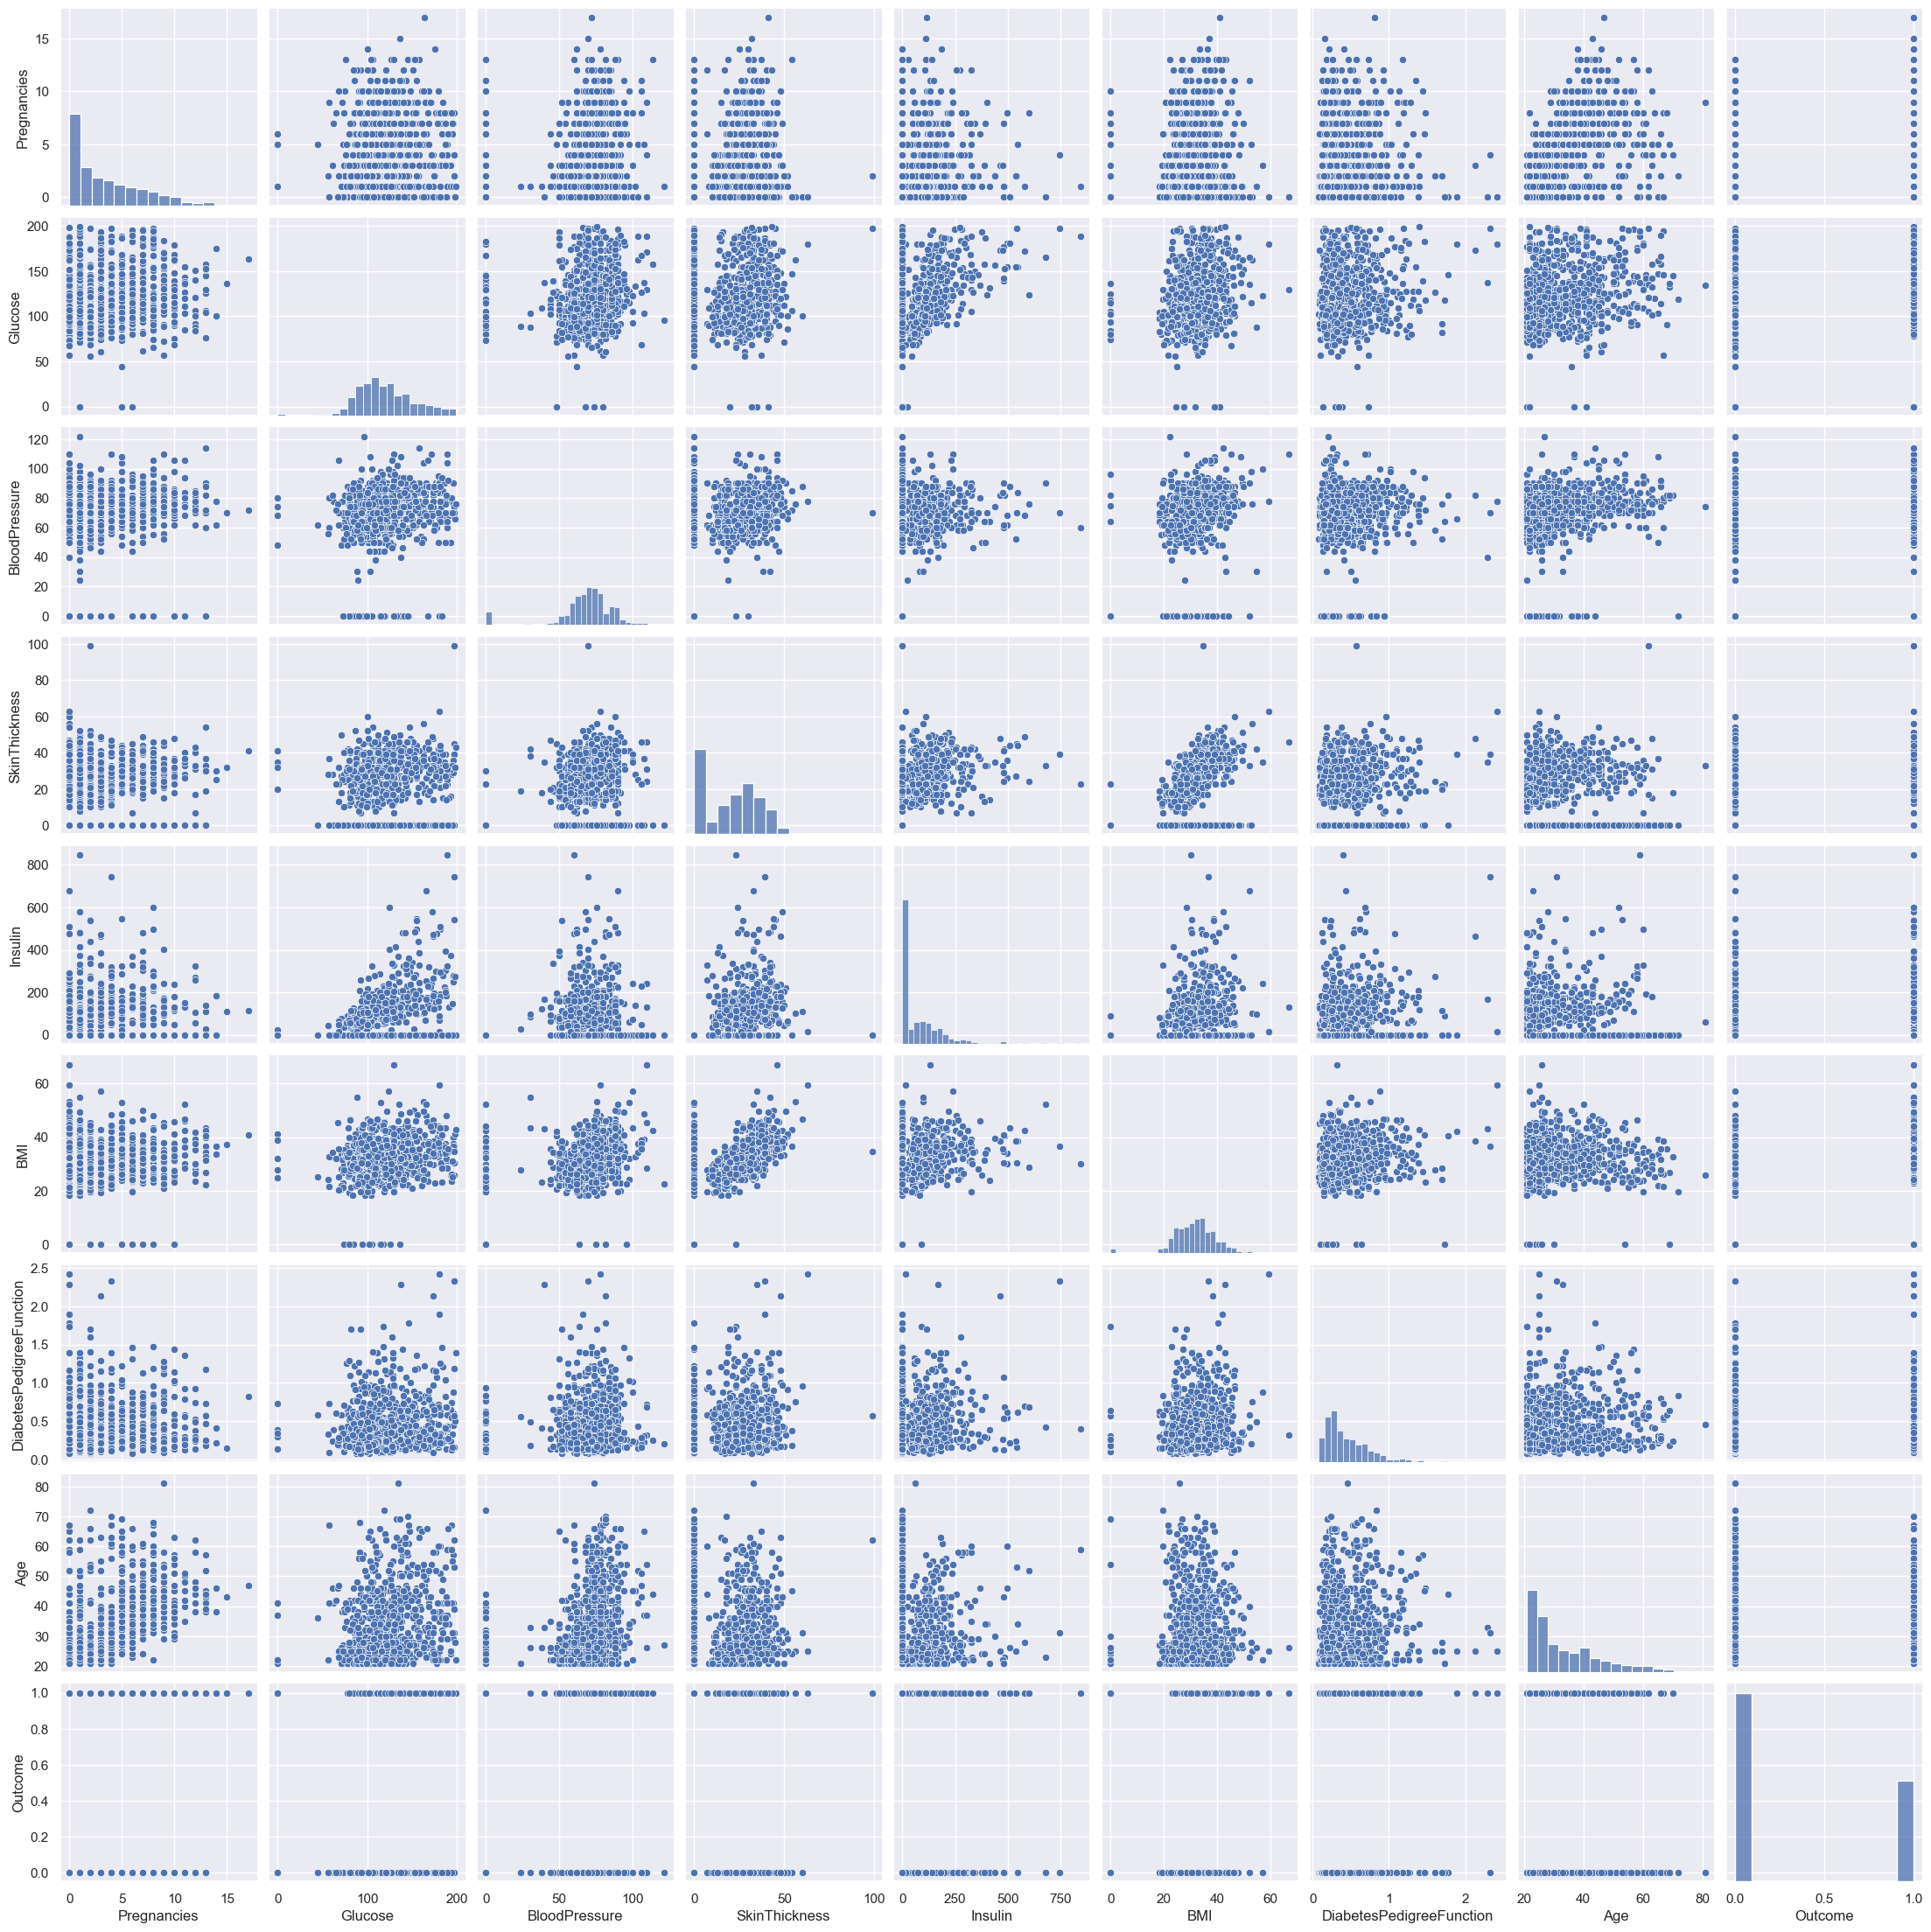

In [17]:
# Draw pairs of variables against one another
sb.pairplot(data = thedata)

In [19]:
# People with the highest level of insulin -- the Top 10
thedata.sort_values('Insulin', ascending=False).head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
584,8,124,76,24,600,28.7,0.687,52,1
409,1,172,68,49,579,42.4,0.702,28,1
286,5,155,84,44,545,38.7,0.619,34,0
8,2,197,70,45,543,30.5,0.158,53,1
655,2,155,52,27,540,38.7,0.240,25,1
753,0,181,88,44,510,43.3,0.222,26,1
186,8,181,68,36,495,30.1,0.615,60,1


In [20]:
# People with the highest level of glucose -- the Top 10
thedata.sort_values('Glucose', ascending=False).head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
561,0,198,66,32,274,41.3,0.502,28,1
228,4,197,70,39,744,36.7,2.329,31,0
8,2,197,70,45,543,30.5,0.158,53,1
579,2,197,70,99,0,34.7,0.575,62,1
408,8,197,74,0,0,25.9,1.191,39,1
359,1,196,76,36,249,36.5,0.875,29,1
22,7,196,90,0,0,39.8,0.451,41,1
206,8,196,76,29,280,37.5,0.605,57,1
675,6,195,70,0,0,30.9,0.328,31,1


With those two TOP 10, we can see that when we classify the people with the highest level of glucose, we have 9 out of 10 who have diabetes. But when we classify the people with the highest level of insulin, we have 7 out of 10 who have diabetes.

In [36]:
import matplotlib.pyplot as plt
sb.set()
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Outcome', ylabel='Glucose'>

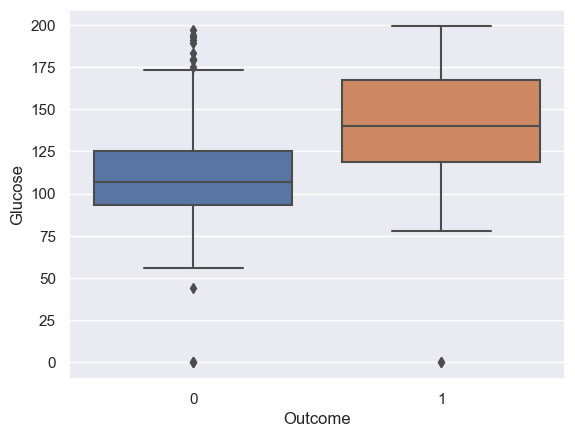

In [25]:
sns.boxplot(x='Outcome', y='Glucose', data=thedata)

We used the box plot to conclude that people with diabetes have high glucose.

### Classification 

In [13]:
insulin = pd.DataFrame(thedata['Insulin'])  # Predictor1
glucose = pd.DataFrame(thedata['Glucose'])  # Predictor2
outcome = pd.DataFrame(thedata['Outcome'])  # Response

In [14]:
from sklearn.model_selection import train_test_split #To split data randomly

In [15]:
# To split the data randomly
insulin_train, insulin_test, glucose_train, glucose_test, outcome_train, outcome_test = train_test_split(insulin, glucose, outcome, test_size=0.20)

In [16]:
# Check the sample sizes
print("Train Set :", insulin_train.shape, glucose_train.shape, outcome_train.shape)
print("Test Set  :", insulin_test.shape, glucose_test.shape, outcome_test.shape)

Train Set : (614, 1) (614, 1) (614, 1)
Test Set  : (154, 1) (154, 1) (154, 1)


In [17]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

#### Training set

In [18]:
# Create a Decision Tree Classifier object
dectree_1 = DecisionTreeClassifier(max_depth = 3)

# Train the Decision Tree Classifier model
dectree_1.fit(insulin_train, outcome_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
# Create a Decision Tree Classifier object
dectree_2 = DecisionTreeClassifier(max_depth = 3)

# Train the Decision Tree Classifier model
dectree_2.fit(glucose_train, outcome_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'Insulin <= 142.0\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = No'),
 Text(0.25, 0.625, 'Insulin <= 14.5\ngini = 0.411\nsamples = 481\nvalue = [342, 139]\nclass = No'),
 Text(0.125, 0.375, 'Insulin <= 7.0\ngini = 0.461\nsamples = 297\nvalue = [190, 107]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.46\nsamples = 296\nvalue = [190, 106]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.375, 0.375, 'Insulin <= 87.5\ngini = 0.287\nsamples = 184\nvalue = [152, 32]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.139\nsamples = 93\nvalue = [86, 7]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.399\nsamples = 91\nvalue = [66, 25]\nclass = No'),
 Text(0.75, 0.625, 'Insulin <= 157.0\ngini = 0.494\nsamples = 133\nvalue = [59, 74]\nclass = Yes'),
 Text(0.625, 0.375, 'Insulin <= 153.5\ngini = 0.337\nsamples = 14\nvalue = [3, 11]\nclass = Yes'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = Yes

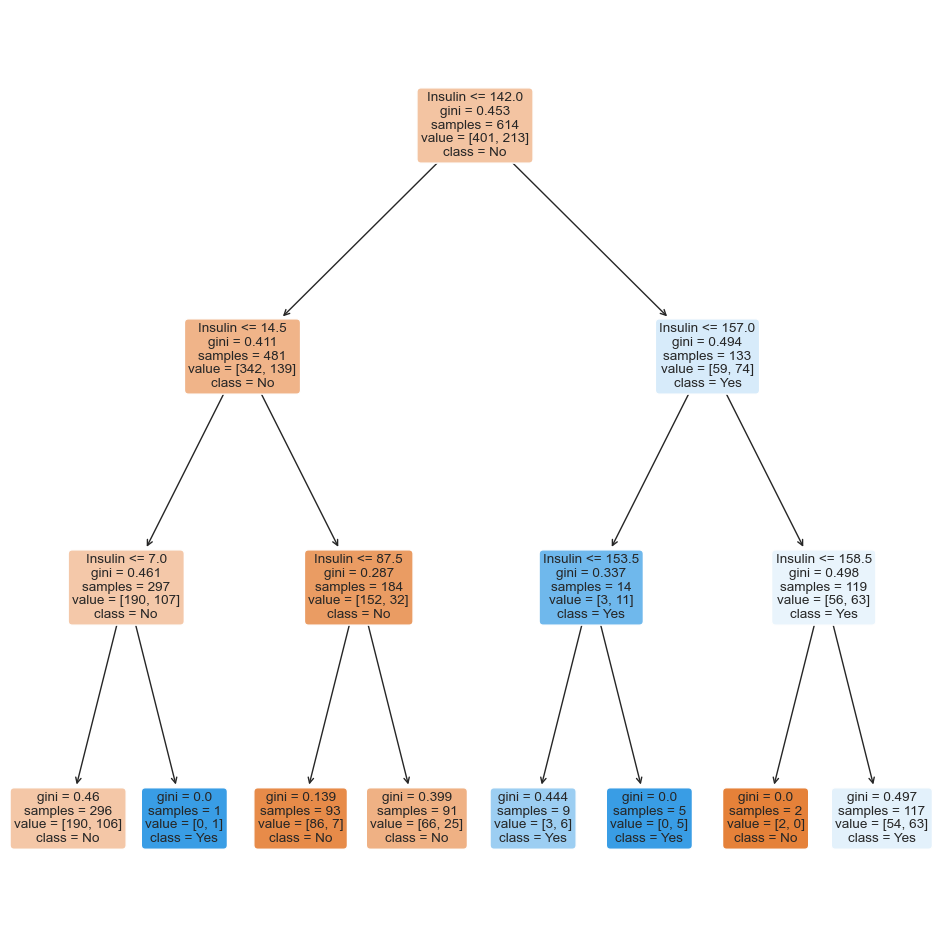

In [37]:
# Plot the trained Decision Tree for Insulin x Outcome
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree_1, filled=True, rounded=True, 
          feature_names=["Insulin"], 
          class_names=["No", "Yes"])

When I observe the leaf nodes I can see the one that has the maximum number of false negative :


For the ones that have been predicted and classed as true (or yes) , we can see that for 2nd leaf node (from the left to the right) 
- We have 0 samples predicted as no, but the actual class is yes. So, we have 0 false positive.
- we have 1 samples predicted as yes, but the actual class is yes. So, we have 1 true positive.


For the ones that have been predicted and classed as false (or no) , we can see that for 7th leaf node (from the left to the right) 
- We have 0 samples predicted as yes, but the actual class is no. So, we have 0 false negatives.
- we have 2 samples predicted as no, but the actual class is no. So, we have 2 true negatives.


If we follow this logic, I can conclude by my observations that the node with the maximum number of false negatives is 1st leaf node (from the left to the right) with the gini of 0.46

Classification Accuracy 	: 0.6824104234527687


<Axes: >

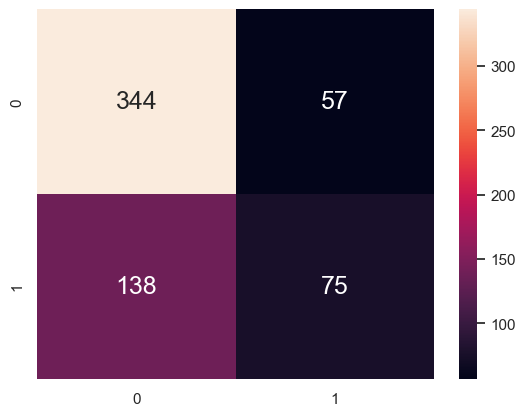

In [39]:
# Prediction corresponding to Insulin Train
outcome_train_pred = dectree_1.predict(insulin_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree_1.score(insulin_train, outcome_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(outcome_train, outcome_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [48]:
# Calculate the leaf indices for each sample in the training dataset
leaf_indices1 = dectree_1.apply(insulin_train)

# Filter out the samples that correspond to the leaf node with index 3
samples_in_highest_fn_leaf1 = insulin_train[leaf_indices1 == 3]

# Print the isolated samples
print("Sample in the leaf node with the highest number of False Negatives:")
print("")
print(samples_in_highest_fn_leaf1)

Sample in the leaf node with the highest number of False Negatives:

     Insulin
261        0
719        0
552        0
557        0
207        0
..       ...
352        0
752        0
218        0
219        0
48         0

[296 rows x 1 columns]


[Text(0.5, 0.875, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = No'),
 Text(0.25, 0.625, 'Glucose <= 99.5\ngini = 0.315\nsamples = 388\nvalue = [312, 76]\nclass = No'),
 Text(0.125, 0.375, 'Glucose <= 97.5\ngini = 0.152\nsamples = 157\nvalue = [144, 13]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.168\nsamples = 140\nvalue = [127, 13]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = No'),
 Text(0.375, 0.375, 'Glucose <= 110.5\ngini = 0.397\nsamples = 231\nvalue = [168, 63]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.355\nsamples = 104\nvalue = [80, 24]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.426\nsamples = 127\nvalue = [88, 39]\nclass = No'),
 Text(0.75, 0.625, 'Glucose <= 154.5\ngini = 0.477\nsamples = 226\nvalue = [89, 137]\nclass = Yes'),
 Text(0.625, 0.375, 'Glucose <= 152.5\ngini = 0.496\nsamples = 125\nvalue = [68, 57]\nclass = No'),
 Text(0.5625, 0.125, 'gini = 0.499\nsamples = 118\nvalue = [62, 56]\nc

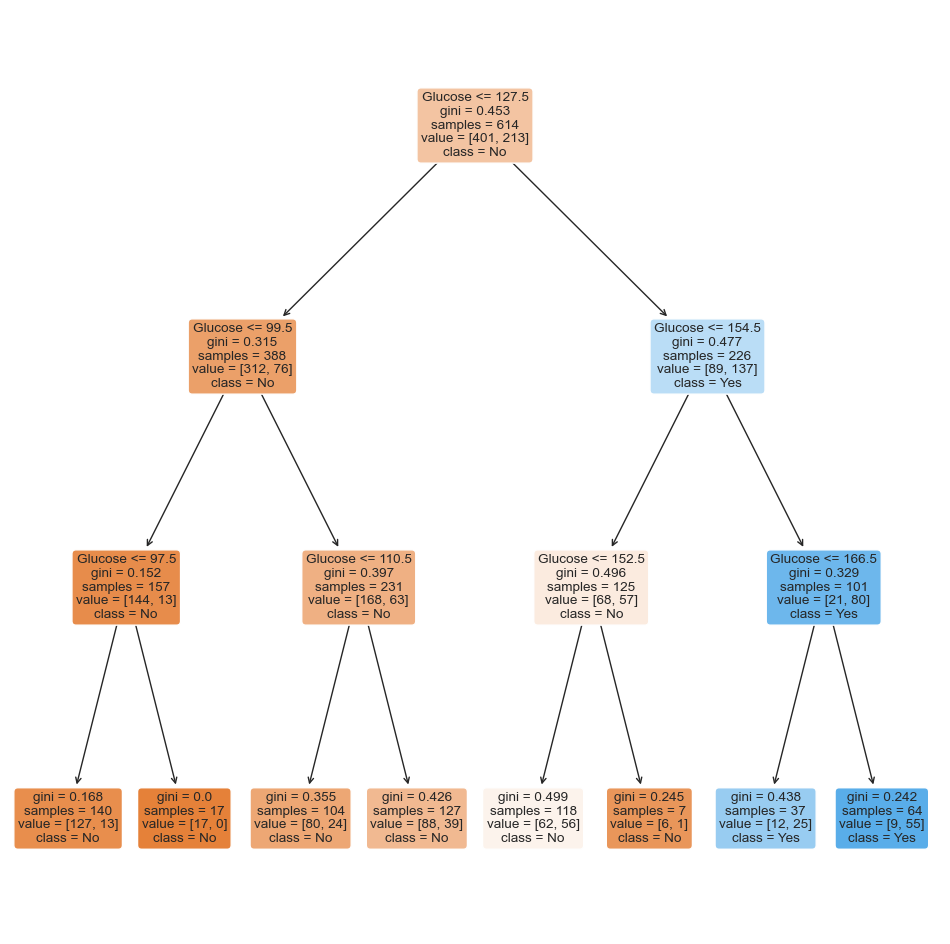

In [38]:
# Plot the trained Decision Tree for Glucose x Outcome
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree_2, filled=True, rounded=True, 
          feature_names=["Glucose"], 
          class_names=["No", "Yes"])

When I observe the leaf nodes I can see the one that has the maximum number of false negative :


For the ones that have been predicted and classed as true (or yes) , we can see that for 7th leaf node (from the left to the right) 
- We have 12 samples predicted as no, but the actual class is yes. So, we have 12 false positive.
- we have 25 samples predicted as yes, but the actual class is yes. So, we have 25 true positive.


For the ones that have been predicted and classed as false (or no) , we can see that for 2nd leaf node (from the left to the right) 
- We have 0 samples predicted as yes, but the actual class is no. So, we have 0 false negatives.
- we have 17 samples predicted as no, but the actual class is no. So, we have 12 true negatives.


If we follow this logic, I can conclude by my observations that the node with the maximum number of false negatives is 4th leaf node (from the left to the right) with the gini of 0.426

Classification Accuracy 	: 0.749185667752443


<Axes: >

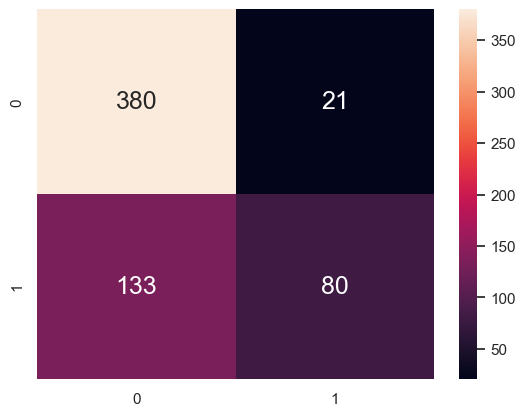

In [41]:
# Prediction corresponding to Glucose Train
outcome_train_pred2 = dectree_2.predict(glucose_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree_2.score(glucose_train, outcome_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(outcome_train, outcome_train_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [47]:
# Calculate the leaf indices for each sample in the training dataset
leaf_indices2 = dectree_2.apply(glucose_train)

# Filter out the samples that correspond to the leaf node with index 3
samples_in_highest_fn_leaf2 = glucose_train[leaf_indices2 == 7]

# Print the isolated samples
print("Sample in the leaf node with the highest number of False Negatives:")
print("")
print(samples_in_highest_fn_leaf2)

Sample in the leaf node with the highest number of False Negatives:

     Glucose
552      114
393      116
757      123
102      125
116      124
..       ...
356      125
222      119
468      120
560      125
219      112

[127 rows x 1 columns]


In a medical setting, both false negatives and false positives have significant implications. However, false negatives (Type II errors) are generally considered more dangerous because they involve missing actual cases of diabetes, leading to potential health complications and risks for the individuals affected. False positives (Type I errors) can also have adverse effects but are often mitigated through further diagnostic tests and evaluations.


Therefore, in this context, false negatives (missing actual diabetes cases) are typically considered the most dangerous outcome for the model to produce. Minimizing false negatives is crucial for ensuring timely diagnosis and treatment of diabetes, ultimately improving patient outcomes and reducing health risks.

In the train set :


When we compare outcome with insulin, we can see that we have approximately 19% of false negative with a classification accuracy of 68.24%. When we compare outcome with glucose, we can see that we have approximately 18% of false negative with a classification accuracy of 74.92%.


- While a classification accuracy of 68.24% and 74.92% may seem relatively high, the high false negative rates (19% and 18%) are concerning, especially in medical diagnosis where timely and accurate identification of positive cases is crucial.


- The model's performance indicates a need for improvement, focusing on reducing false negatives without significantly increasing false positives.


- Continuous refinement, feature engineering, adjusting model thresholds, and incorporating domain knowledge can help enhance the model's ability to correctly identify individuals with diabetes while maintaining overall performance metrics.

#### Test set

In [20]:
# Create a Decision Tree Classifier object
dectree_3 = DecisionTreeClassifier(max_depth = 3)

# Test the Decision Tree Classifier model
dectree_3.fit(insulin_test, outcome_test)

DecisionTreeClassifier(max_depth=3)

In [21]:
# Create a Decision Tree Classifier object
dectree_4 = DecisionTreeClassifier(max_depth = 3)

# Test the Decision Tree Classifier model
dectree_4.fit(glucose_test, outcome_test)

DecisionTreeClassifier(max_depth=3)

[Text(0.4230769230769231, 0.875, 'Insulin <= 113.0\ngini = 0.459\nsamples = 154\nvalue = [99, 55]\nclass = No'),
 Text(0.15384615384615385, 0.625, 'Insulin <= 9.0\ngini = 0.427\nsamples = 110\nvalue = [76, 34]\nclass = No'),
 Text(0.07692307692307693, 0.375, 'gini = 0.484\nsamples = 78\nvalue = [46, 32]\nclass = No'),
 Text(0.23076923076923078, 0.375, 'Insulin <= 63.5\ngini = 0.117\nsamples = 32\nvalue = [30, 2]\nclass = No'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = No'),
 Text(0.3076923076923077, 0.125, 'gini = 0.208\nsamples = 17\nvalue = [15, 2]\nclass = No'),
 Text(0.6923076923076923, 0.625, 'Insulin <= 137.5\ngini = 0.499\nsamples = 44\nvalue = [23, 21]\nclass = No'),
 Text(0.5384615384615384, 0.375, 'Insulin <= 123.0\ngini = 0.375\nsamples = 12\nvalue = [3, 9]\nclass = Yes'),
 Text(0.46153846153846156, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = Yes'),
 Text(0.6153846153846154, 0.125, 'gini = 0.245\nsamples = 7\nvalue = 

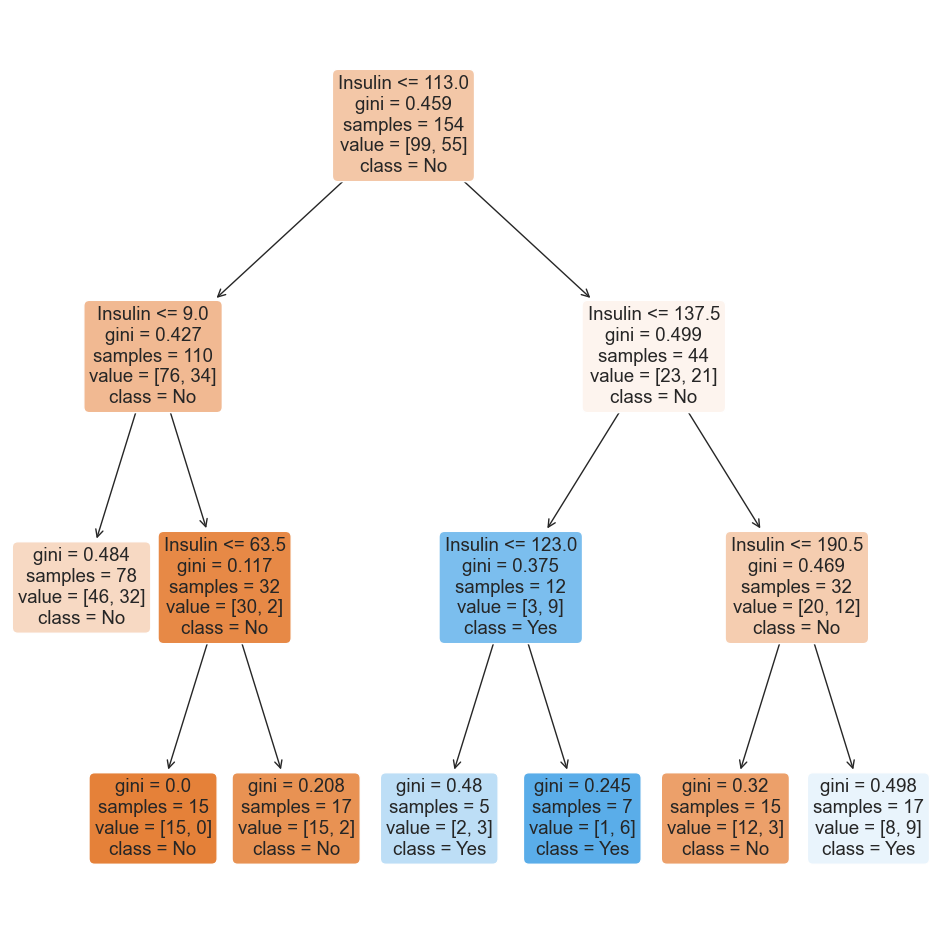

In [56]:
# Plot the trained Decision Tree for Insulin x Outcome
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree_3, filled=True, rounded=True, 
          feature_names=["Insulin"], 
          class_names=["No", "Yes"])

I can conclude by my observations that the node with the maximum number of false negatives is 5th leaf node (from the left to the right) with the gini of 0.32

Classification Accuracy 	: 0.6883116883116883


<Axes: >

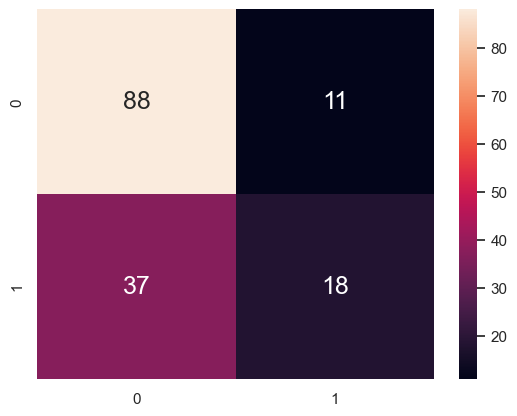

In [63]:
# Prediction corresponding to Insulin Test
outcome_test_pred = dectree_3.predict(insulin_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree_3.score(insulin_test, outcome_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(outcome_test, outcome_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [67]:
# Calculate the leaf indices for each sample in the test dataset
leaf_indices3 = dectree_3.apply(insulin_test)

# Filter out the samples that correspond to the leaf node with index 3
samples_in_highest_fn_leaf3 = insulin_test[leaf_indices3 == 11]

# Print the isolated samples
print("Sample in the leaf node with the highest number of False Negatives:")
print("")
print(samples_in_highest_fn_leaf3)

Sample in the leaf node with the highest number of False Negatives:

     Insulin
698      155
91       176
223      190
307      148
59       142
498      145
738      160
469      140
420      170
204      190
114      175
311      148
282      155
528      188
4        168


[Text(0.5769230769230769, 0.875, 'Glucose <= 138.5\ngini = 0.459\nsamples = 154\nvalue = [99, 55]\nclass = No'),
 Text(0.3076923076923077, 0.625, 'Glucose <= 103.5\ngini = 0.324\nsamples = 113\nvalue = [90, 23]\nclass = No'),
 Text(0.15384615384615385, 0.375, 'Glucose <= 33.5\ngini = 0.122\nsamples = 46\nvalue = [43, 3]\nclass = No'),
 Text(0.07692307692307693, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.23076923076923078, 0.125, 'gini = 0.085\nsamples = 45\nvalue = [43, 2]\nclass = No'),
 Text(0.46153846153846156, 0.375, 'Glucose <= 104.5\ngini = 0.419\nsamples = 67\nvalue = [47, 20]\nclass = No'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.5384615384615384, 0.125, 'gini = 0.41\nsamples = 66\nvalue = [47, 19]\nclass = No'),
 Text(0.8461538461538461, 0.625, 'Glucose <= 181.0\ngini = 0.343\nsamples = 41\nvalue = [9, 32]\nclass = Yes'),
 Text(0.7692307692307693, 0.375, 'Glucose <= 141.5\ngini = 0.382\nsam

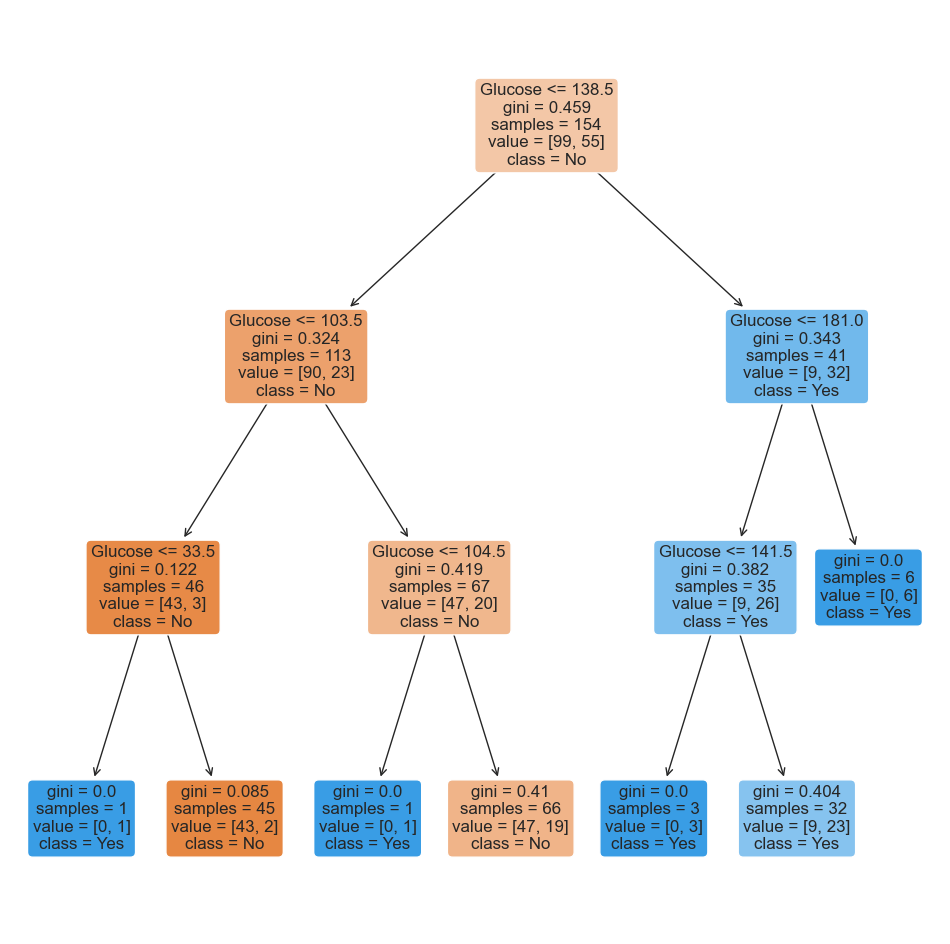

In [62]:
# Plot the trained Decision Tree for Glucose x Outcome
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree_4, filled=True, rounded=True, 
          feature_names=["Glucose"], 
          class_names=["No", "Yes"])

I can conclude by my observations that the node with the maximum number of false negatives is 4th leaf node (from the left to the right) with the gini of 0.41

Classification Accuracy 	: 0.8051948051948052


<Axes: >

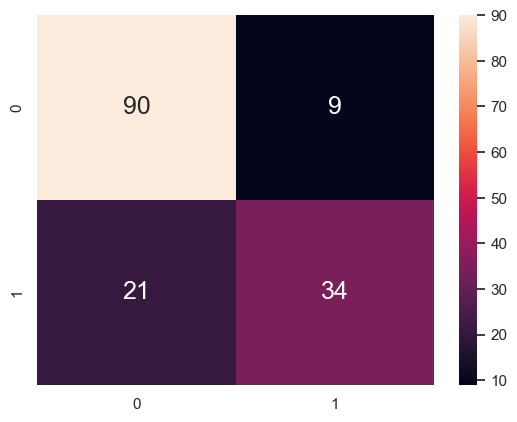

In [64]:
# Prediction corresponding to Glucose Test
outcome_test_pred2 = dectree_4.predict(glucose_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree_4.score(glucose_test, outcome_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(outcome_test, outcome_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [66]:
# Calculate the leaf indices for each sample in the test dataset
leaf_indices4 = dectree_4.apply(glucose_test)

# Filter out the samples that correspond to the leaf node with index 3
samples_in_highest_fn_leaf4 = glucose_test[leaf_indices4 == 7]

# Print the isolated samples
print("Sample in the leaf node with the highest number of False Negatives:")
print("")
print(samples_in_highest_fn_leaf4)

Sample in the leaf node with the highest number of False Negatives:

     Glucose
698      127
357      129
477      114
177      129
683      125
..       ...
169      111
205      111
89       107
336      117
4        137

[66 rows x 1 columns]


In the test set :


When we compare outcome with insulin, we can see that we have approximately 24% of false negative with a classification accuracy of 68.83%. When we compare outcome with glucose, we can see that we have approximately 14% of false negative with a classification accuracy of 80.52%.


- The false negative rate of 24% with insulin-based prediction and 14% with glucose-based prediction both indicate room for improvement in identifying positive diabetes cases.


- While the classification accuracy for glucose-based prediction (80.52%) is higher than that for insulin-based prediction (68.83%), the false negative rate is a crucial metric in medical diagnostics and should be prioritized for improvement.


- Continued refinement of the model through feature engineering, threshold adjustments, and incorporating domain knowledge can help reduce false negatives and enhance overall diagnostic accuracy.

### Attempt at determining the type of diabetes 

In [29]:
ddata = pd.read_csv('C:/Users/kavya/OneDrive/Desktop/diabetes.csv', header = None)
ddata.head()

,0,1,2,3,4,5,6,7,8
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [30]:
ddata.columns = ddata.iloc[0]
ddata = ddata.drop(0)

In [33]:
ddata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Type
1,6,148,72,35,0,33.6,0.627,50,1,2
2,1,85,66,29,0,26.6,0.351,31,0,0
3,8,183,64,0,0,23.3,0.672,32,1,2
4,1,89,66,23,94,28.1,0.167,21,0,0
5,0,137,40,35,168,43.1,2.288,33,1,2
...,...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0,0
765,2,122,70,27,0,36.8,0.34,27,0,0
766,5,121,72,23,112,26.2,0.245,30,0,0
767,1,126,60,0,0,30.1,0.349,47,1,1


In [ ]:
### 

In [34]:
def calculate_new_value(row):
    if (row['Outcome']) == '1':
        if((int(row['Insulin'])<25) and (int(row['Pregnancies'])<6)):
            return 1
        else:
            return 2

    else:
        return 0

ddata['Type']= ddata.apply(calculate_new_value,axis=1)
ddata.to_csv('diabetes.csv', index= False)

        

In [35]:
ddata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Type
1,6,148,72,35,0,33.6,0.627,50,1,2
2,1,85,66,29,0,26.6,0.351,31,0,0
3,8,183,64,0,0,23.3,0.672,32,1,2
4,1,89,66,23,94,28.1,0.167,21,0,0
5,0,137,40,35,168,43.1,2.288,33,1,2
...,...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0,0
765,2,122,70,27,0,36.8,0.34,27,0,0
766,5,121,72,23,112,26.2,0.245,30,0,0
767,1,126,60,0,0,30.1,0.349,47,1,1


### Using the dataset to predict risk of hypertension and diabetes acidosis 

In [36]:
def calculate_dkaprone(row):
    if (row['Outcome']) == '1':
        if((int(row['Insulin'])<25) and (int(row['Pregnancies'])<6)):
            if(int(row['Age'])<30):
                return 1
            else :
                return 0
        else:
            return 0

    else:
        return 0

def calculate_Hypertension(row):
    if (row['Outcome']) == '1':
        if((int(row['Insulin'])<25) and (int(row['Pregnancies'])<6)):
            return 0
        else:
            if ((int(row['BloodPressure'])>80) and (int(row['BloodPressure'])<90)) :
                return 1
            elif ((int(row['BloodPressure'])>90) and (int(row['BloodPressure'])<119)):
                return 2
            elif ((int(row['BloodPressure'])>119)):
                return 3
            return 0

    else:
        return 0

ddata['DKAprone']= ddata.apply(calculate_dkaprone,axis=1)
ddata['Hypertension']= ddata.apply(calculate_Hypertension,axis=1)


ddata.to_csv('diabetes.csv', index= False)


In [37]:
ddata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Type,DKAprone,Hypertension
1,6,148,72,35,0,33.6,0.627,50,1,2,0,0
2,1,85,66,29,0,26.6,0.351,31,0,0,0,0
3,8,183,64,0,0,23.3,0.672,32,1,2,0,0
4,1,89,66,23,94,28.1,0.167,21,0,0,0,0
5,0,137,40,35,168,43.1,2.288,33,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0,0,0,0
765,2,122,70,27,0,36.8,0.34,27,0,0,0,0
766,5,121,72,23,112,26.2,0.245,30,0,0,0,0
767,1,126,60,0,0,30.1,0.349,47,1,1,0,0


In [38]:
ddata.describe()

,Type,DKAprone,Hypertension
count,768.000000,768.000000,768.000000
mean,0.601562,0.042969,0.083333
std,0.863635,0.202919,0.328297
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000
max,2.000000,1.000000,2.000000


The above data shows that majority of patients in the dataset are not prone to Diabetic Ketoacidosis or Hypertension.

On observing 

-> Hypertension: the min and max values are 0 and 2 respectively. This indicates that no patient has stage 3 hypertension. The mean value suggests that majority of the outcomes are towards 0 thus, supporting our conclusion.

-> DKAprone: the min and max values are 0 and 1 respectively. The mean value suggests that the majority of outcomes are leaning toward 0, suggesting that majority of patients are not prone to Diabetic Ketoacidosis.

### Optimisation Model 

- optimisation model (random forest) --> important features for both existing database (vasu)
- divide into 2 dataframes(type 1 or 2) and important features thing again (vasu)

#### Random Forest
- The advantage of using this technique is that we get lower variance, reduced overfitting and higher accuracy.
- Healthcare and Medical Industry --> Diabetes Prediction, Cardiovascular disease prediction, Breast Cancer Prediction
- grdsbgion

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini')

In [43]:
X = thedata.drop('Outcome', axis=1)
y = thedata['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
rfc.score(X_test, y_test)

0.7077922077922078

#### printing first 3 trees

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

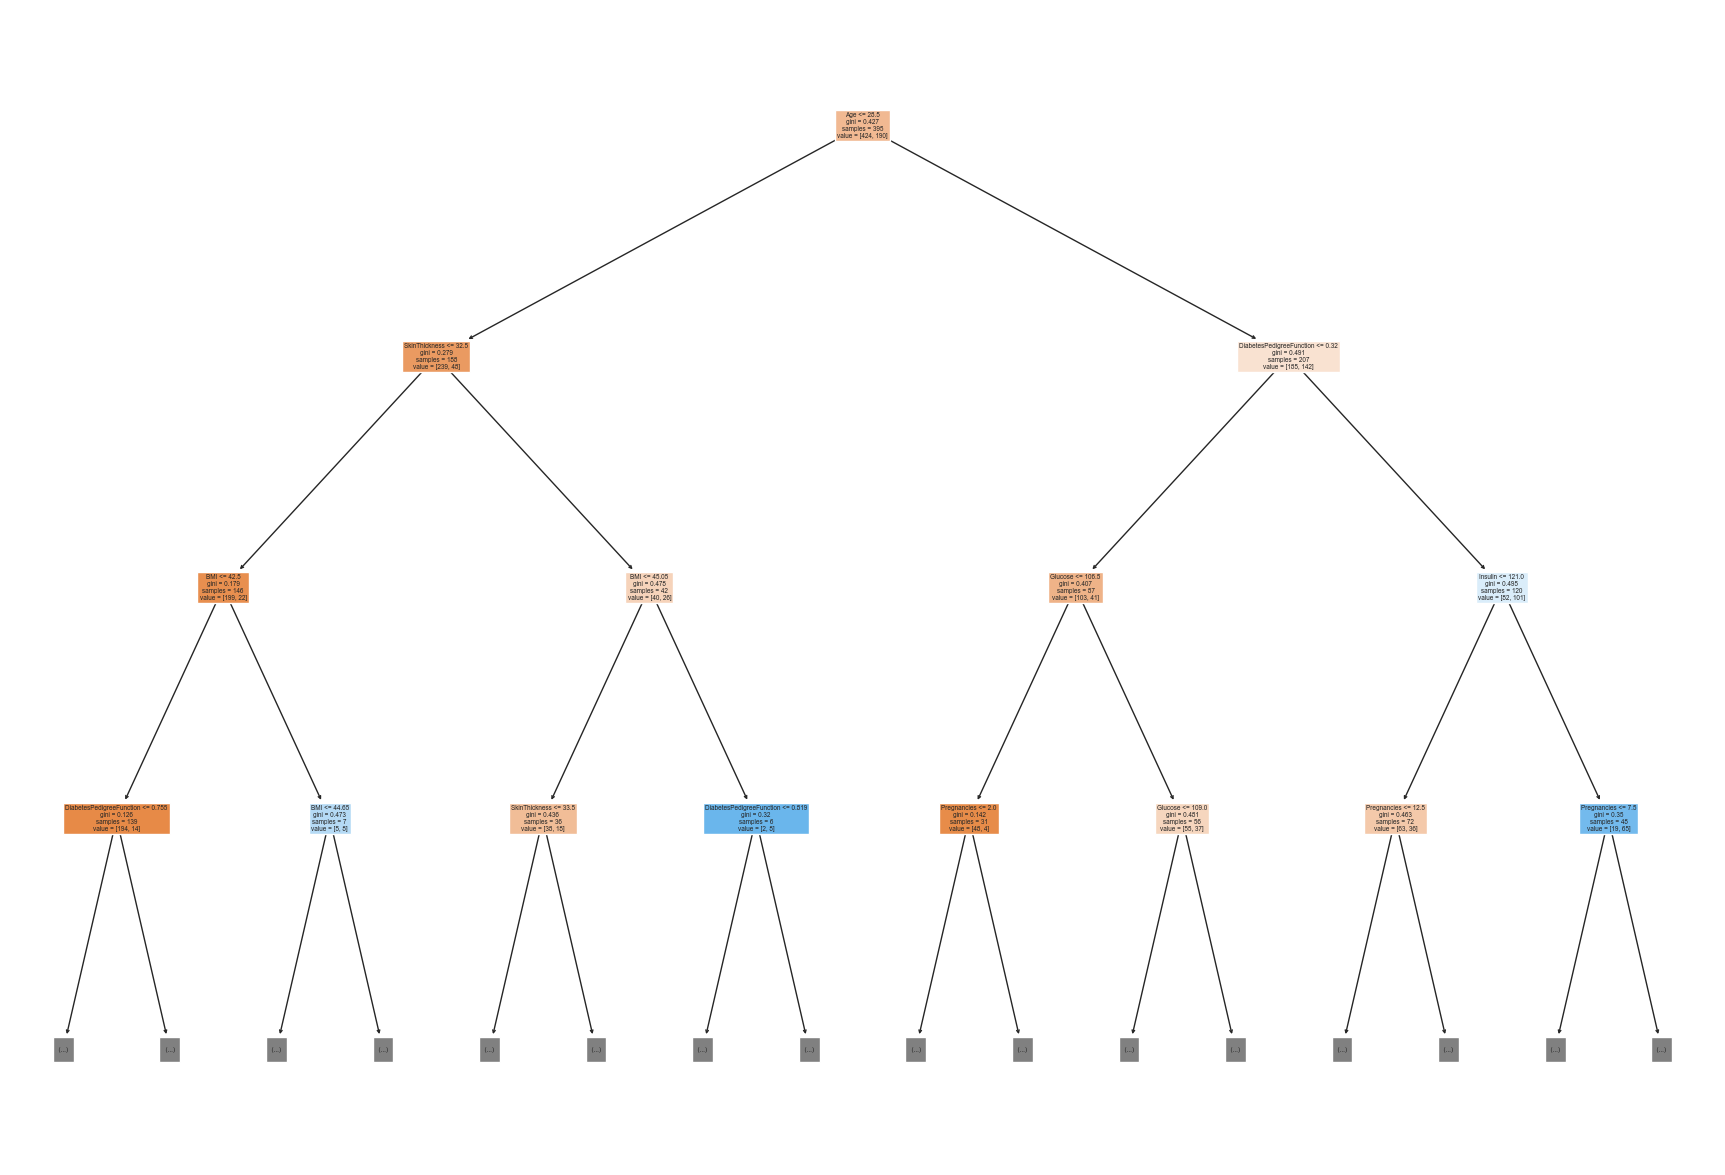

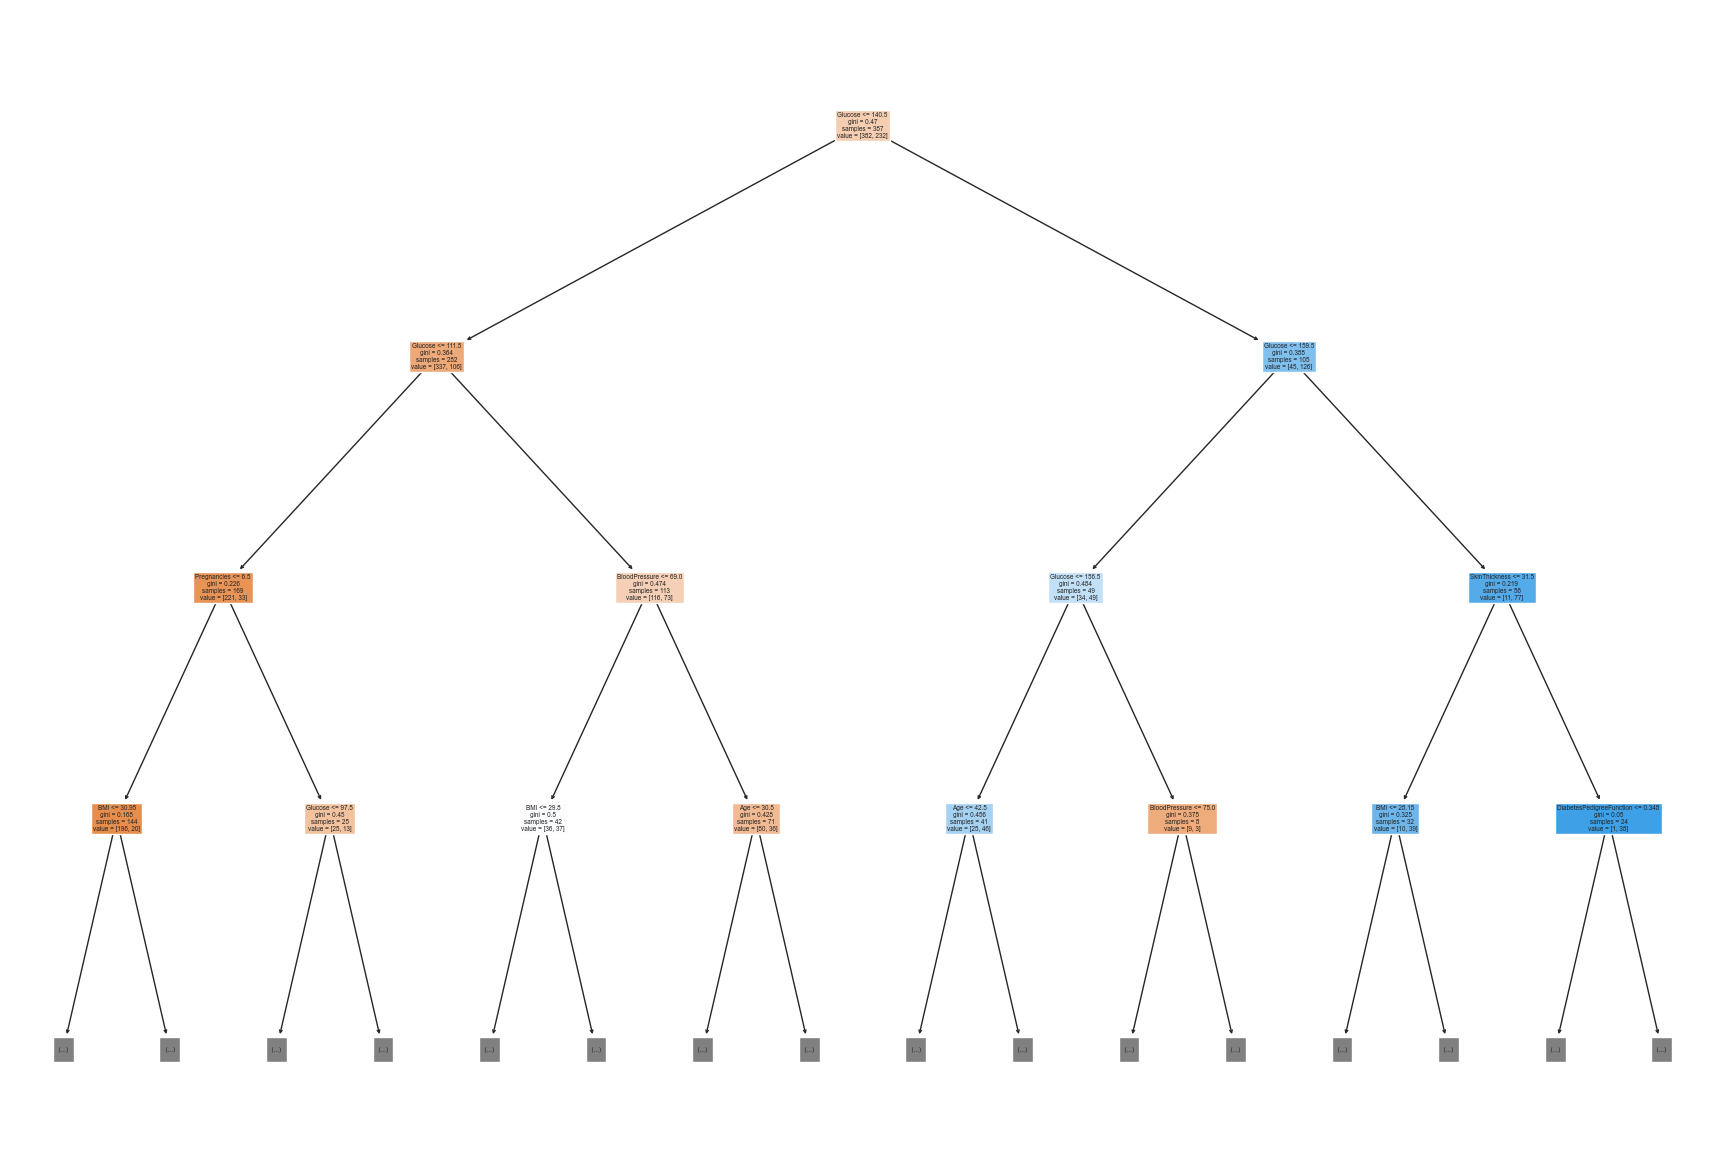

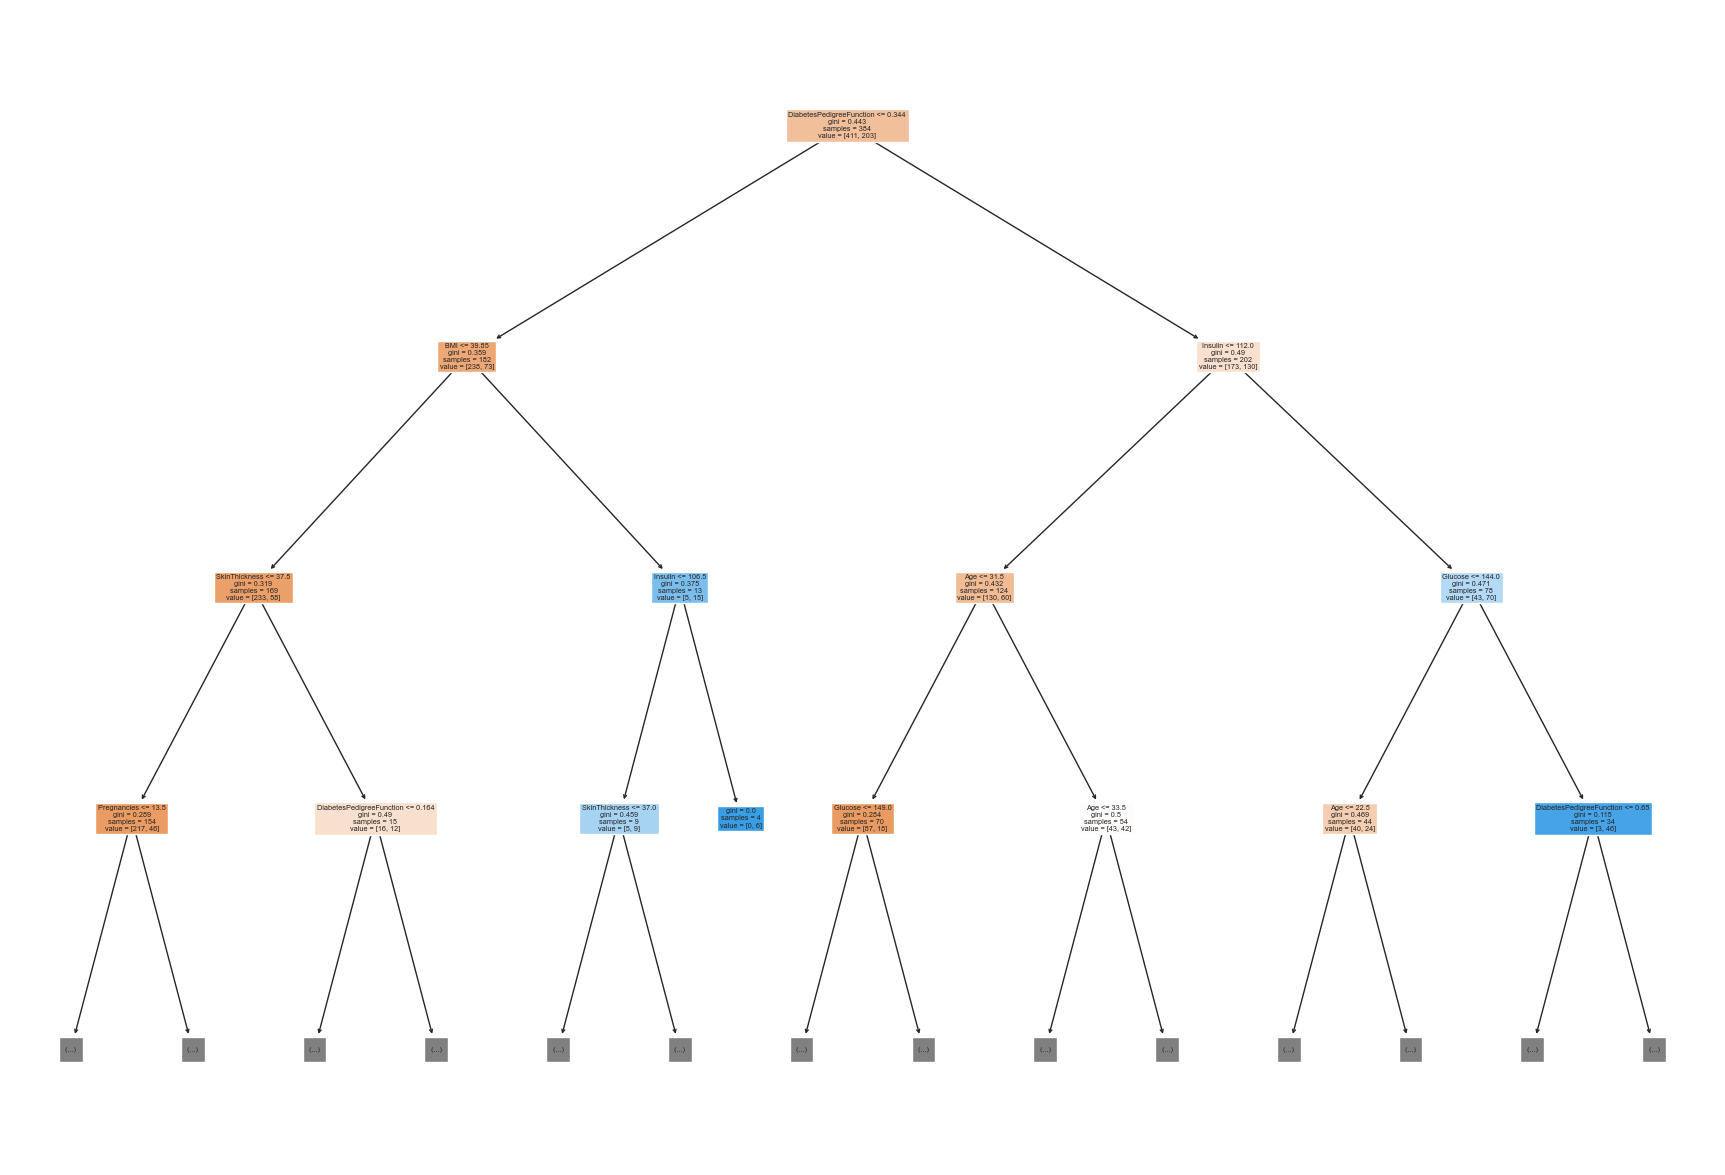

In [47]:
## printing first 3 trees
for i in range(3):
    tree = rfc.estimators_[i]
    
    plt.figure(figsize=(22, 15))  # Adjust the figure size as needed
    plot_tree(tree, feature_names = X_train.columns, filled=True, max_depth=3, impurity=True)
    plt.show()

- n_estimators: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.
- 
max_depth: the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [49]:
param_dist = {'n_estimators': randint(50,500), 'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rfc, param_distributions = param_dist, n_iter=5, cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002248768FB90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022487681390>})

In [50]:
best_estimator = rand_search.best_estimator_      # Access the best estimator

best_params = rand_search.best_params_            # Access the best hyperparameters

In [51]:
print("Best estimator:", best_estimator)
print("Best hyperparameters:", best_params)

Best estimator: RandomForestClassifier(max_depth=4, n_estimators=411)
Best hyperparameters: {'max_depth': 4, 'n_estimators': 411}


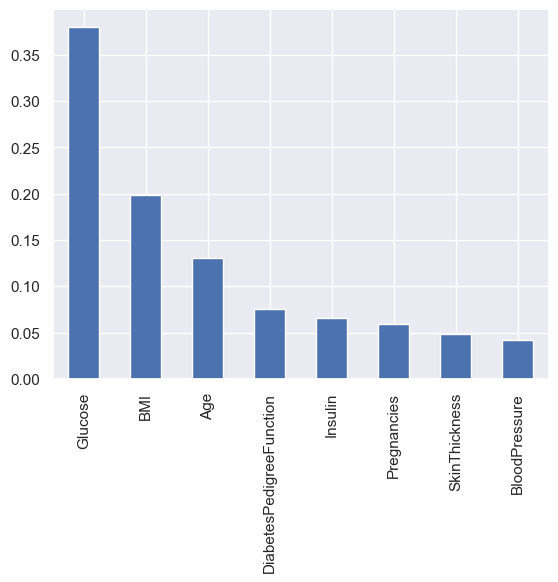

In [52]:
# Create a variable for the best model
best_model = rand_search.best_estimator_

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

Through hyperparameter tuning, we obtain the best estimator and use that to determine the most important features in the dataset. Through feature importance analysis, we can conclude which variable has the most significant influence on the outcome. 

From the above bar chart, we can deduce that Glucose is indeed the most important contibuting factor to determination of outcome.

### Conclusion 

We began by investigating a diabetes dataset to understand the key factors impacting patients. We used various visualizations, including scatter plots and boxplots amongst others, to do EDA and understand the relationships between different variables. Classification techniques helped determine the contribution every factor had towards the outcome. We created new columns to determine the type of diabetes along with identifying patients at risk for DKA (Diabetic Ketoacidosis) and hypertension as well as the stages of hypertension. We used a Random Forest optimization model to determine the most influential factor. Based on the combined observations made from EDA, classification, and the Random Forest optimisation model, we concluded that glucose levels have the strongest association. From the observationa from the DKAprone function and hypertension, we can conclude that majority patients dont have those complications. 